In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Тестовое задание


Вы, как продуктовый аналитик отдела маркетинга, провели A/B-тест в ходе которого проверяли насколько эффективно показывать рекламное предложение на экране оплаты. 
За группу А вы обозначали тех клиентов, которые экран оплаты без рекламного предложения, за группу Б - тех кто видел рекламное предложение. 
Все полученные результаты представленны в файла data.xlsx. Расшифровка полей файлов:

Лист "заказы"
- выручка — выручка заказа;
- группа — группа A/B-теста, в которую попал заказ;
- транзакция — идентификатор заказа;
- пользователь — идентификатор пользователя, совершившего заказ;
- дата — дата, когда был совершён заказ.

Лист "пользователи"
- группа — группа A/B-теста;
- пользователи — количество пользователей в указанную дату в указанной группе A/B-теста
- дата — дата.


Ответьте письменно на вопросы, оцените результаты A/B-теста, сформулируйте вывод и добавьте рекомендации для отдела маркетинга.

Список вопросов для письменного ответа:
1) Как рассчитать размер выборки для A/B-теста?
2) Что должна включать в себя постановка задачи на проведение эксперимента?
3) Как определяются метрики эксперимента? Какими свойствами должны обладать метрики эксперимента?

# Решение

In [48]:
df_z = pd.read_excel('C:/Users/RINAT/Downloads/data.xlsx', sheet_name = 'Заказы')
df_z

,Транзакция,Пользователь,дата,выручка,группа
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [165]:
df_z['выручка'].sort_values()

584          50
1091         50
756          50
459          50
1013         60
         ...   
744       86620
1136      92550
858       93940
1196     202740
425     1294500
Name: выручка, Length: 1197, dtype: int64

In [49]:
df_p = pd.read_excel('C:/Users/RINAT/Downloads/data.xlsx', sheet_name = 'Пользователи')
df_p

,Дата,Группа,Пользователи
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


##  Ответы на вопросы

- Как рассчитать размер выборки для A/B-теста?
- Что должна включать в себя постановка задачи на проведение эксперимента?
- Как определяются метрики эксперимента? Какими свойствами должны обладать метрики эксперимента?

### Размер выборки
Для расчета размера тестовой и контрольной групп нам нужно знать:
   - стандартное отклонение (или дисперсию) для значения метрики отдельного пользователя
   - величину минимального эффекта, который мы хотим обнаруживать
   - допустимый уровень ошибки первого рода
   - допустимый уровень ошибки второго рода

Мы можем вычислить размер **одной** выборки, если определим допустимые вероятности ошибок, ожидаемый размер эффекта и оценим стандартное отклонение метрики.
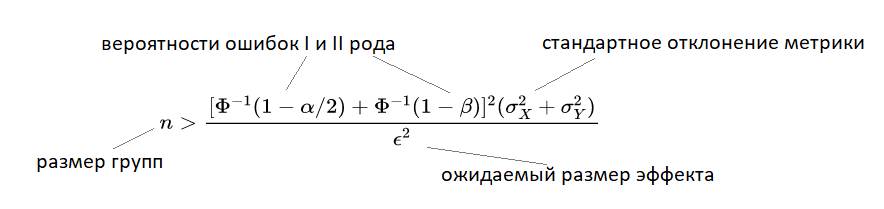

- **$Φ^-1$** - это обозначение специальной функции из статистики (обратная функция нормального распределения), её значения можно получить, поменяв для функции распределения горизонтальную и вертикальную ось местами:
    - при α = 0.05 получаем Φ^(−1) = (1 - α/2) = 1.96
    - при β = 0.1 получаем Φ^(−1) = (1 - β) = 1.28

### Постановка задачи

1. Что проверяем (гипотеза)?
2. Что делаем в продукте? 
3. На какие метрики смотрим?
4. Определяем пути разделения на группы (50/50, 95/5 и т.д.)
5. На каких пользователях тестируем (мобилки/десктоп, регион, новые/старые юзеры)?
6. Параметры теста (дизайн): ошибки I и II рода, эффект, размер выборки, время.
7. План действий в случае успеха и неудачи?

### Метрики и их свойства
Метрика А/В-теста – это показатель, с помощью которого оцениваются результаты и доказательство гипотезы.

Выбор метрик зависит от цели эксперимента. Например, если цель эксперимента - увеличить выручку, то стоит использовать такую метрику как общую выручку. Если цель увеличить количество клиентов, которые возвращаются и совершают повторные покупки, метрикой может быть процент повторных покупок.

Метрики должны обладать следующими свойствами:

- **Релевантность:** Метрики должны быть тесно связаны с целью вашего эксперимента. Если цель - увеличить выручку, то нет смысла измерять уровень удовлетворенности пользователей.

- **Чувствительность:** Метрики должны быть достаточно чувствительны, чтобы отражать изменения в том, что вы пытаетесь измерить. Если метрика слишком "грубая" и не отражает небольшие изменения, это может затруднить определение того, было ли вмешательство успешным.

- **Надежность:** Метрики должны быть стабильными и надежными. Это означает, что они должны давать согласованные результаты при повторном измерении в схожих условиях.

- **Достоверность:** Результаты, полученные на основе выбранных метрик, должны быть достоверными и проверяемыми. Важно убедиться, что выбранные метрики действительно измеряют то, что предполагается измерить.

В рамках теста можно отслеживать сотни и тысячи метрик, некоторые из которых могут впоследствии стать метриками для принятия решений при неожиданном влиянии на них. Полезно заранее определить все важные для вашего продукта метрики и проверять их в каждом тесте, даже если вы не ожидаете увидеть влияние на большинство из них.

Среди сотни метрик при p-value 0,05, с большой долей вероятности хотя бы несколько из них покажут значимый результат в случае, когда в действительности его нет. Поэтому для метрик, на которые вы не ожидаете влияния, можно установить более высокий порог для принятия решения по p-value, например, 0,01.

В контексте нашего A/B-теста, потенциальными метриками могут быть: 

- **Конверсия корзины.** Доля юзеров, добавившие товар в уже "собранную" коризну. Идеально было бы понять добавляют ли юзеры новый дополнительный товар с предложенной рекламной рекомендации в корзине или нет. 
- **Процент повторных покупок в период после n-минут от прошлого заказа.** Возможно юзеры задумаются после рекламы и сделают новый заказ (возможно есть какие-то ограничения по добавлению новых товаров в коризну. Например, если доставка становится платной после превышения определенного веса в корзине).
- **Средний чек.**

Повышение общей конверсии может привести к увеличению общей выручки, даже если средний чек снижается, так как большее количество людей совершает покупки. С другой стороны, если средний чек значительно возрастает, общая выручка может увеличиться, даже если конверсия остается неизменной.

Так как, в нашем наборе нет данных о пользователях, которые не совершили покупку, то оценить конверсию будет сложно, так как конверсия - это отношение числа совершивших покупку пользователей к общему числу юзеров в корзине.

В таком случае метрика среднего чека может быть более полезной. Это позволит узнать, приводит ли показ рекламного предложения на экране оплаты к увеличению суммы, которую пользователи тратят при совершении покупки.

## Оценка А/В теста

### Рассмотрим кумулятивный график

In [ ]:
df_a1 = df_p.query('Группа == "A"')
df_a2 = df_p.query('Группа == "B"')

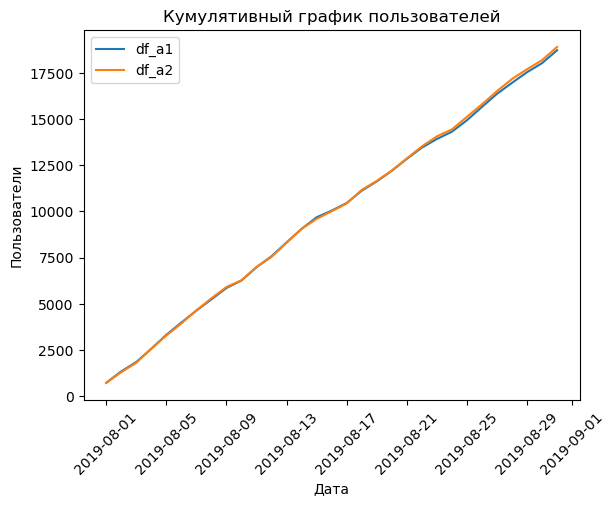

In [175]:
# Построение кумулятивных графиков
df_a1['Дата'] = pd.to_datetime(df_a1['Дата'])
df_a2['Дата'] = pd.to_datetime(df_a2['Дата'])

# Сортировка по столбцу 'Дата'
df_a1 = df_a1.sort_values(by='Дата')
df_a2 = df_a2.sort_values(by='Дата')

# Рассчет кумулятивной суммы пользователей
df_a1['Кумулятивные пользователи'] = df_a1['Пользователи'].cumsum()
df_a2['Кумулятивные пользователи'] = df_a2['Пользователи'].cumsum()


plt.plot(df_a1['Дата'], df_a1['Кумулятивные пользователи'], label='df_a1')
plt.plot(df_a2['Дата'], df_a2['Кумулятивные пользователи'], label='df_a2')

plt.xlabel('Дата')
plt.ylabel('Пользователи')
plt.title('Кумулятивный график пользователей')
plt.xticks(rotation=45)
plt.legend()

In [25]:
df_p.groupby('Группа')\
    .agg({'Пользователи':'sum'})\
    .reset_index()

,Группа,Пользователи
0,A,18736
1,B,18916


<AxesSubplot:xlabel='Дата', ylabel='Пользователи'>

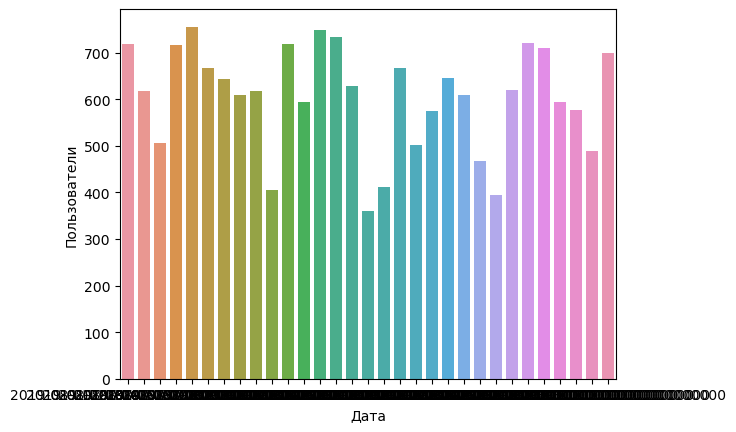

In [28]:
sns.barplot(data=df_p.query('Группа=="A"'), x = 'Дата', y='Пользователи')

<AxesSubplot:xlabel='Дата', ylabel='Пользователи'>

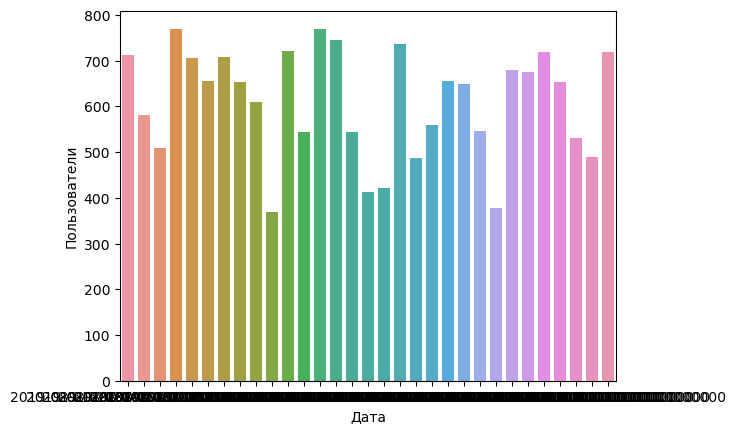

In [30]:
sns.barplot(data=df_p.query('Группа=="B"'), x = 'Дата', y='Пользователи')

### Расчет метрики

In [50]:
df_z

,Транзакция,Пользователь,дата,выручка,группа
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [80]:
df_z_a = df_z.query('группа == "A"')\
    .groupby('Пользователь')\
    .agg({'выручка':['count', 'sum']})\
    .reset_index()

df_z_a

Пользователь выручка       
                   count    sum
0        8300375       1   1790
1       11685486       1   6201
2       54447517       1    130
3       66685450       1   7990
4       78758296       1   1044
..           ...     ...    ...
498   4243832526       1   8290
499   4256040402       7  48800
500   4259830713       1   3190
501   4266935830       1  78990
502   4278982564       1  24744

[503 rows x 3 columns]

In [88]:
df_z_b = df_z.query('группа == "B"')\
    .groupby('Пользователь')\
    .agg({'выручка':['count', 'sum']})\
    .reset_index()

df_z_b

Пользователь выручка       
                   count    sum
0        5114589       1    570
1        6958315       1   1490
2        8300375       1  10510
3       39475350       1   3990
4       47206413       1    730
..           ...     ...    ...
581   4258103007       1   6145
582   4266935830       1  78990
583   4279090005       1   6716
584   4281247801       1   2640
585   4283872382       1   3806

[586 rows x 3 columns]

Средний чек нельзя представить в виде какой-то агрегации по одной пользовательской метрике (средняя средних). Это метрика отношений двух пользовательских метрик (сумма/кол-во), т.к. различные транзакции одного юзера не будут независимыми. T-test в классическом виде тут не применим, т.к. такая связь в данных недопустима, ведь t-test рассчитан на использование независимых данных, а также нет одной метрики для каждого юзера. Если мы не будем обращать на это внимание, а попытаемся формально провести t-test, то с большой вероятностью мы получим неверный результат, так как такой тест неправильно оценит уровни ошибок первого и второго рода. А значит, итоговое решение об успешности или неудаче эксперимента будет основано на неверных предпосылках.

Для определения статистической значимости различий воспользуемся тремя подходами:
1. Дельта-метод
2. Линеаризация
3. Бутстрап

При корректном расчете - все они должны вернуть непротивоположные друг другу результаты.

### Дельта-метод

Найдем значения **метрик отношения** для обеих групп:

In [87]:
df_z_a['выручка']['sum'].sum()/df_z_a['выручка']['count'].sum()

7333.578096947936

In [89]:
df_z_b['выручка']['sum'].sum()/df_z_b['выручка']['count'].sum()

9230.875

Найдем оценку **средних значений** числителя и знаменателя:

Группа A:

In [90]:
df_z_a['выручка']['sum'].mean()

8120.880715705765

In [91]:
df_z_a['выручка']['count'].mean()

1.1073558648111332

Группа В: 

In [92]:
df_z_b['выручка']['sum'].mean()

10081.501706484642

In [93]:
df_z_b['выручка']['count'].mean()

1.0921501706484642

Найдем оценку **дисперсий** для числителя и знаменателя:

Группа A:

In [94]:
df_z_a['выручка']['sum'].var()

170894594.86622095

In [95]:
df_z_a['выручка']['count'].var()

0.2673362217135462

Группа В:

In [97]:
df_z_b['выручка']['sum'].var()

3031211247.8333325

In [96]:
df_z_b['выручка']['count'].var()

0.19662203552988586

Найдем оценку **ковариации** между числителем и знаменателем:

Группа A:

In [114]:
np.cov(df_z_a['выручка']['sum'], df_z_a['выручка']['count'])[0, 1]

1634.046695920097

Группа В:

In [115]:
np.cov(df_z_b['выручка']['sum'], df_z_b['выручка']['count'])[0, 1]

1672.5348852133832

С помощью дельта-метода находим дисперсию метрики:
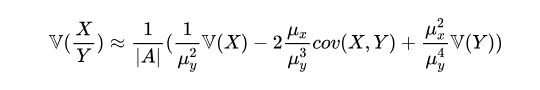
На основе вычисленной таким образом дисперсии мы можем посчитать значение статистики теста, а затем подставить в распределение Стьюдента или стандартное нормальное распределение для того, чтобы найти
p-value. 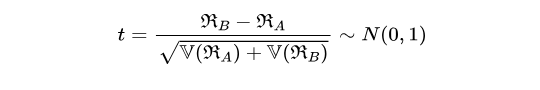

Дисперсия метрики отношения **(Группа A)**:

In [121]:
v_a = (1/(503 * 1.107**2)) * (170894594.866 - 2 * 8120.880/1.107 * 1634.046 + 0.267 * (8120.880/1.107)**2)
v_a

261662.4259021401

Дисперсия метрики отношения **(Группа B)**:

In [122]:
v_b = (1/(586 * 1.092**2)) * (3031211247.833 - 2 * 10081.501/1.092 * 1672.534 + 0.196 * (10081.501/1.092)**2)
v_b

4317550.315155794

Найдем **разность метрик отношений**:

In [125]:
(df_z_b['выручка']['sum'].sum()/df_z_b['выручка']['count'].sum()) - (df_z_a['выручка']['sum'].sum()/df_z_a['выручка']['count'].sum())

1897.2969030520644

Найдем **статистику критерия**. Это величина отклонения в нормальном распределении:

In [126]:
1897.296 / (v_a + v_b)**0.5

0.8866244039313063

Найдем **p-value**:

In [128]:
import scipy.stats

t_statistic = 0.8866
df = (503 - 1) + (586 - 1)

# вычисляем односторонний p-value
p_value_one_sided = scipy.stats.t.sf(t_statistic, df)

# удваиваем для получения двустороннего p-value
p_value = p_value_one_sided * 2

print(f'p-value is {p_value}')

p-value is 0.37549040045189996


### Линеаризация

Группа A:

In [132]:
a_linear = df_z_a['выручка']['sum'] - df_z_a['выручка']['count'] * 7333.578
a_linear

0      -5543.578
1      -1132.578
2      -7203.578
3        656.422
4      -6289.578
         ...    
498      956.422
499    -2535.046
500    -4143.578
501    71656.422
502    17410.422
Length: 503, dtype: float64

Группа В:

In [133]:
b_linear = df_z_b['выручка']['sum'] - df_z_b['выручка']['count'] * 7333.578
b_linear

0      -6763.578
1      -5843.578
2       3176.422
3      -3343.578
4      -6603.578
         ...    
581    -1188.578
582    71656.422
583     -617.578
584    -4693.578
585    -3527.578
Length: 586, dtype: float64

In [135]:
from scipy import stats

stats.ttest_ind(a_linear, b_linear, equal_var = False)

Ttest_indResult(statistic=-0.8860137339141101, pvalue=0.3759342200838871)

### Бутстрап

In [138]:
df_z_a

Пользователь выручка       
                   count    sum
0        8300375       1   1790
1       11685486       1   6201
2       54447517       1    130
3       66685450       1   7990
4       78758296       1   1044
..           ...     ...    ...
498   4243832526       1   8290
499   4256040402       7  48800
500   4259830713       1   3190
501   4266935830       1  78990
502   4278982564       1  24744

[503 rows x 3 columns]

In [140]:
df_z_b

Пользователь выручка       
                   count    sum
0        5114589       1    570
1        6958315       1   1490
2        8300375       1  10510
3       39475350       1   3990
4       47206413       1    730
..           ...     ...    ...
581   4258103007       1   6145
582   4266935830       1  78990
583   4279090005       1   6716
584   4281247801       1   2640
585   4283872382       1   3806

[586 rows x 3 columns]

**Важный нюанс!** Требуется семплировать не отдельные элементы выборки, а пользователей (именно они являются независимыми элементами). Это единственное отличие от обычного бутстпрепа. Поэтому нам нужно перевести наши данные в словарь:

In [150]:
# для группы А
users = df_z_a['Пользователь']
counts = df_z_a['выручка']['count']
sums = df_z_a['выручка']['sum']

# Создаём пустой словарь
user_data_a = {}

# Заполняем словарь
for i in range(len(users)):
    user_data_a[users[i]] = [counts[i], sums[i]]

# Выводим словарь
for key, value in user_data_a.items():
    print(f"Пользователь: {key}, данные: {value}")


Пользователь: 8300375, данные: [1, 1790]
Пользователь: 11685486, данные: [1, 6201]
Пользователь: 54447517, данные: [1, 130]
Пользователь: 66685450, данные: [1, 7990]
Пользователь: 78758296, данные: [1, 1044]
Пользователь: 85103373, данные: [1, 1220]
Пользователь: 87885904, данные: [1, 300]
Пользователь: 109615108, данные: [1, 2190]
Пользователь: 130417038, данные: [1, 1530]
Пользователь: 132143192, данные: [1, 750]
Пользователь: 138252163, данные: [1, 4580]
Пользователь: 148427295, данные: [1, 65710]
Пользователь: 151496413, данные: [1, 350]
Пользователь: 178249104, данные: [1, 16950]
Пользователь: 181166394, данные: [1, 4780]
Пользователь: 182753106, данные: [1, 300]
Пользователь: 184835319, данные: [1, 1190]
Пользователь: 187589092, данные: [1, 17940]
Пользователь: 199603092, данные: [4, 19692]
Пользователь: 199874245, данные: [1, 240]
Пользователь: 232979603, данные: [1, 60]
Пользователь: 235366767, данные: [1, 780]
Пользователь: 236764260, данные: [1, 5640]
Пользователь: 237748145,

In [151]:
# для группы В
users = df_z_b['Пользователь']
counts = df_z_b['выручка']['count']
sums = df_z_b['выручка']['sum']

# Создаём пустой словарь
user_data_b = {}

# Заполняем словарь
for i in range(len(users)):
    user_data_b[users[i]] = [counts[i], sums[i]]

# Выводим словарь
for key, value in user_data_b.items():
    print(f"Пользователь: {key}, данные: {value}")

Пользователь: 5114589, данные: [1, 570]
Пользователь: 6958315, данные: [1, 1490]
Пользователь: 8300375, данные: [1, 10510]
Пользователь: 39475350, данные: [1, 3990]
Пользователь: 47206413, данные: [1, 730]
Пользователь: 48147722, данные: [1, 1090]
Пользователь: 56960363, данные: [1, 1490]
Пользователь: 71018815, данные: [1, 15485]
Пользователь: 78678012, данные: [1, 1440]
Пользователь: 91069833, данные: [1, 820]
Пользователь: 102981183, данные: [1, 14489]
Пользователь: 104602633, данные: [1, 2920]
Пользователь: 113298937, данные: [1, 27600]
Пользователь: 114507418, данные: [1, 610]
Пользователь: 117599621, данные: [1, 1290]
Пользователь: 134926050, данные: [1, 2990]
Пользователь: 152397976, данные: [1, 490]
Пользователь: 154576532, данные: [1, 26550]
Пользователь: 154825609, данные: [1, 4210]
Пользователь: 157579733, данные: [1, 2330]
Пользователь: 162423694, данные: [1, 9400]
Пользователь: 171459513, данные: [1, 5690]
Пользователь: 172218683, данные: [1, 1440]
Пользователь: 179951984,

In [156]:
import random


def bootstrap_ratio(user_data, n_bootstrap_samples=1000):
    users = list(user_data.keys())
    bootstrap_ratios = []
    for _ in range(n_bootstrap_samples):
        # Случайный выбор пользователей с заменой
        bootstrap_users = random.choices(users, k=len(users))

        # Вычисление ratio для каждого пользователя и добавление в список
        ratios = [user_data[user][1] / user_data[user][0] for user in bootstrap_users]

        # Вычисление среднего ratio для данной выборки и добавление в список средних
        bootstrap_ratios.append(np.mean(ratios))
        
    return bootstrap_ratios

# Применяем функцию к обоим группам пользователей
bootstrap_ratios_a = bootstrap_ratio(user_data_a)
bootstrap_ratios_b = bootstrap_ratio(user_data_b)

# Вычисляем разницу между средними ratio для обоих групп
difference = np.array(bootstrap_ratios_b) - np.array(bootstrap_ratios_a)

# Выводим результат
print("Средняя разница в ratio:", np.mean(difference))

# доверительный интервал
lower_bound = np.percentile(difference, 2.5)
upper_bound = np.percentile(difference, 97.5)

print("95% доверительный интервал для разности метрики ratio: [{}, {}]".format(lower_bound, upper_bound))

Средняя разница в ratio: 1999.6541475244017
95% доверительный интервал для разности метрики ratio: [-1372.0286870692391, 7186.163131557433]


## Выводы и рекомендации

Результаты теста **не показали статистически значимых различий в среднем чеке между группами A и B**, это означает, что на текущем уровне значимости нет достаточных доказательств того, что показ рекламного предложения влияет на средний чек.

В таком случае, можно рассмотреть следующие рекомендации:

- Провести более длительное тестирование, чтобы увеличить объем данных и повысить статистическую мощность анализа.

- Проверить другие метрики, такие как конверсия, удержание клиентов или показатель оттока, чтобы оценить возможное влияние показа рекламного предложения на эти показатели.

- Исследовать другие факторы или переменные, которые могут влиять на поведение клиентов, и провести дополнительные эксперименты или анализы для более полного понимания эффекта рекламного предложения на поведение пользователей.